# Camera sensor preprocssing

In [3]:
%matplotlib inline
from nuscenes.nuscenes import NuScenes

VERSION = 'v1.0-mini'
DATAROOT = '/Users/kaitoY/data/nuScenes/mini'

nusc = NuScenes(version=VERSION, dataroot=DATAROOT, verbose=False)
my_scene = nusc.scene[0]
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)
my_sample['data']

{'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
 'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
 'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
 'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
 'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
 'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
 'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
 'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
 'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
 'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
 'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
 'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'}

In [4]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

### Load camera image

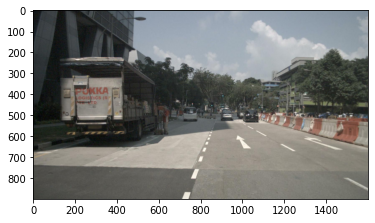

In [6]:
import cv2
import os
from matplotlib import pyplot as plt
%matplotlib inline
img = cv2.imread(os.path.join(DATAROOT, cam_front_data['filename']))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### Preprocessing

In [12]:
import numpy as np
# Values to be used for image normalization (BGR order, since INPUT.FORMAT defaults to BGR).
# To train on images of different number of channels, just set different mean & std.
# Default values are the mean pixel value from ImageNet: [103.53, 116.28, 123.675]
PIXEL_MEAN = np.array([103.530, 116.280, 123.675])
PIXEL_STD = np.array([57.375, 57.120, 58.395])

def pre_process(x):
    return (x - PIXEL_MEAN) / PIXEL_STD


In [14]:
norm_img = pre_process(img)
norm_img

array([[[-1.3687146 , -1.65056022, -1.58703656],
        [-1.38614379, -1.66806723, -1.60416132],
        [-1.3512854 , -1.65056022, -1.63841082],
        ...,
        [ 0.82736383,  0.3802521 ,  0.00556554],
        [ 0.82736383,  0.3802521 ,  0.00556554],
        [ 0.82736383,  0.3802521 ,  0.00556554]],

       [[-1.38614379, -1.66806723, -1.60416132],
        [-1.38614379, -1.66806723, -1.60416132],
        [-1.33385621, -1.63305322, -1.62128607],
        ...,
        [ 0.82736383,  0.3802521 ,  0.00556554],
        [ 0.82736383,  0.3802521 ,  0.00556554],
        [ 0.82736383,  0.3802521 ,  0.00556554]],

       [[-1.50814815, -1.75560224, -1.68978508],
        [-1.49071895, -1.73809524, -1.67266033],
        [-1.42100218, -1.68557423, -1.67266033],
        ...,
        [ 0.82736383,  0.3802521 ,  0.00556554],
        [ 0.82736383,  0.3802521 ,  0.00556554],
        [ 0.82736383,  0.3802521 ,  0.00556554]],

       ...,

       [[-1.3512854 , -1.58053221, -1.67266033],
        [-0

In [15]:
norm_img.max()


2.64

In [16]:
norm_img.min()

-2.1179039301310043

In [17]:
cap = cv2.VideoCapture("/Users/kaitoY/Downloads/2016_0528_130102_538.MP4")
capok, frame = cap.read()

In [22]:
np.mean(frame, axis=(0,1))

array([144.49791522, 137.4275897 , 129.99195023])

In [23]:
np.std(frame, axis=(0,1))

array([86.4014795 , 85.71474569, 84.38628487])

In [24]:
np.mean(img, axis=(0,1))

array([108.45558611, 111.16479583, 110.32102778])

In [25]:
np.std(img, axis=(0,1))

array([55.50914184, 53.80600073, 54.56800493])

In [26]:
pmean = np.array([144.49791522, 137.4275897 , 129.99195023])
pstd = np.array([86.4014795 , 85.71474569, 84.38628487])

n_frame = (frame - pmean) / pstd

In [27]:
n_frame.min()

-1.6724009363751695

In [28]:
n_frame.max()

1.4813787567799586

In [29]:
nn_feam = pre_process(frame)
print(nn_feam.max())
print(nn_feam.min())

2.64
-2.1179039301310043
